## Formative Assessment - Global super store Sales Analysis


## Perform the basic data cleaning


1. Importing the Dataset

In [3]:
import pandas as pd

# Load the dataset from Google Sheets (convert to CSV for easier access)
url = 'https://docs.google.com/spreadsheets/d/1Ez8RhO1rE2QikfdddOZ19eEZhN4r6eW7WHb9qB05T7E/export?format=csv'
data = pd.read_csv(url)

# Display the first few rows
print(data.head())


   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891   7/31/2012   7/31/2012      Same Day    RH-19495   
1   26341    IN-2013-77878    2/5/2013    2/7/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   1/28/2013   1/30/2013   First Class    KM-16375   
4   47221     SG-2013-4320   11/5/2013   11/6/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

2. Handling Missing Values


In [4]:
# Check for missing values
print(data.isnull().sum())


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [ ]:
# Fill missing Postal Code with 0 (example)
data['Postal Code'] = data['Postal Code'].fillna(0)
print(data.isnull().sum())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


3. Correcting Data Types
Ensure numeric columns are of appropriate types and date columns are parsed.



In [6]:
# Convert columns to numeric
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Convert date columns
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


4. Standardizing Text Columns
Ensure consistency in text fields (e.g., country names, ship modes).


In [7]:
# Standardize country names (example)
data['Country'] = data['Country'].str.strip().str.title()

# Standardize ship modes
data['Ship Mode'] = data['Ship Mode'].str.strip().str.upper()


5. Removing Duplicates
Remove duplicate rows if any exist.


In [8]:
# Drop duplicate rows
data = data.drop_duplicates()

# Confirm no duplicates
print(f"Number of duplicates: {data.duplicated().sum()}")


Number of duplicates: 0


6. Handling Outliers
Use the IQR (Interquartile Range) method to detect and handle outliers.

In [ ]:
# Removing outliers in 'Sales'
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['Sales'] >= lower_limit) & (data['Sales'] <= upper_limit)]


## Segment the visuals using country, region, market 

1. Data Aggregation
Summarizing the data to get sales and transaction counts segmented by Country, Region, and Market.



In [10]:
# Aggregate sales and transactions by Country, Region, and Market
country_sales = data.groupby('Country')['Sales'].sum().reset_index()
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
market_sales = data.groupby('Market')['Sales'].sum().reset_index()

country_transactions = data['Country'].value_counts().reset_index()
region_transactions = data['Region'].value_counts().reset_index()
market_transactions = data['Market'].value_counts().reset_index()


2. Bar Chart: Total Sales by Country


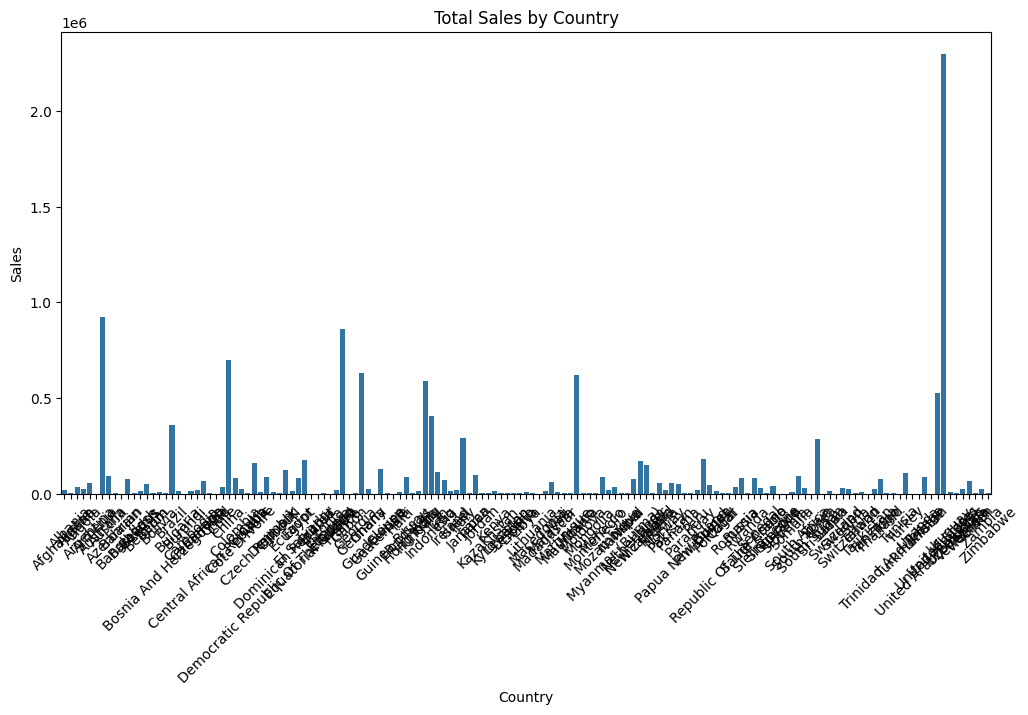

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Sales by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Sales', data=country_sales)
plt.title('Total Sales by Country')
plt.xticks(rotation=45)
plt.show()


3. Map Visualization: Geographical Sales Distribution
A map visualization provides an intuitive way to see where sales are concentrated globally.



In [14]:
import plotly.express as px

# Map of Sales by Country
fig = px.choropleth(country_sales, locations="Country", locationmode="country names", color="Sales",
                    title="Geographical Distribution of Sales", color_continuous_scale="Viridis")
fig.show()


4. Pie Charts: Regional Sales Contributions
Pie  charts effectively visualize how regions contribute to total sales.



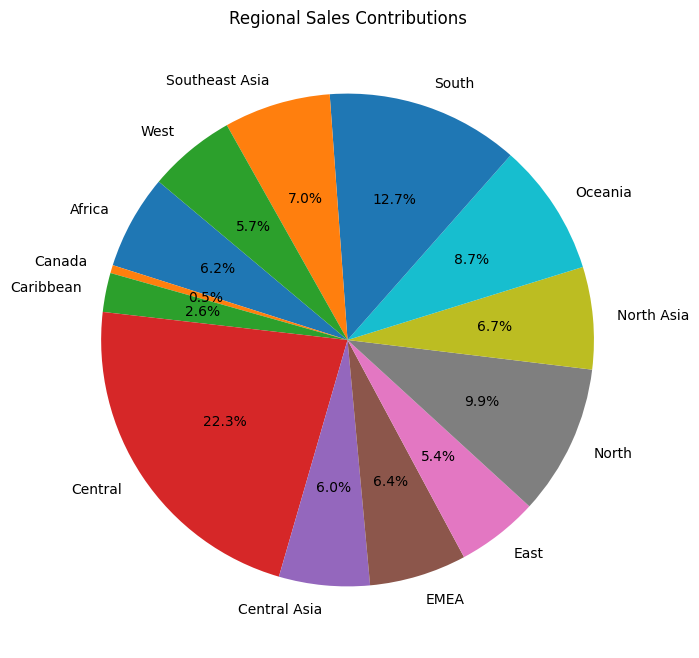

In [15]:
# Pie Chart for Regional Sales
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Contributions')
plt.show()


## Analyze the data by visualizing the percentage of shipping based on ship mode.(Score:1)


1. Calculate Shipping Percentages
Aggregate the data to count orders by Ship Mode and calculate their percentages.



In [16]:
# Calculate the count and percentage of orders by Ship Mode
ship_mode_counts = data['Ship Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship Mode', 'Order Count']
ship_mode_counts['Percentage'] = (ship_mode_counts['Order Count'] / ship_mode_counts['Order Count'].sum()) * 100

# Display the data
print(ship_mode_counts)


        Ship Mode  Order Count  Percentage
0  STANDARD CLASS        30775   60.001950
1    SECOND CLASS        10309   20.099435
2     FIRST CLASS         7505   14.632482
3        SAME DAY         2701    5.266134


2. Create Visualizations
Pie Chart:
Pie charts are ideal for showing proportional data like shipping percentages.



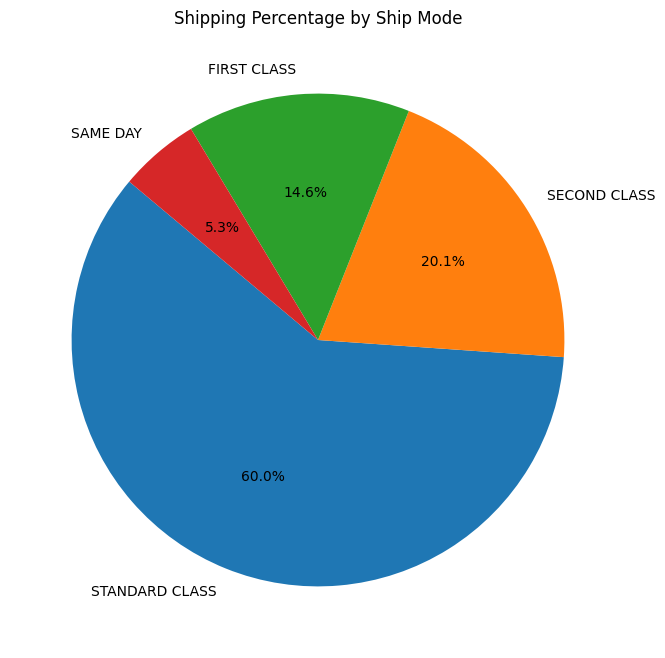

In [17]:
import matplotlib.pyplot as plt

# Pie Chart for Ship Mode Percentages
plt.figure(figsize=(8, 8))
plt.pie(ship_mode_counts['Percentage'], labels=ship_mode_counts['Ship Mode'], autopct='%1.1f%%', startangle=140)
plt.title('Shipping Percentage by Ship Mode')
plt.show()


Stacked Bar Chart:
Stacked bar charts can show the count of orders segmented by shipping modes.



C:\Users\hp\AppData\Local\Temp\ipykernel_13796\916838283.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




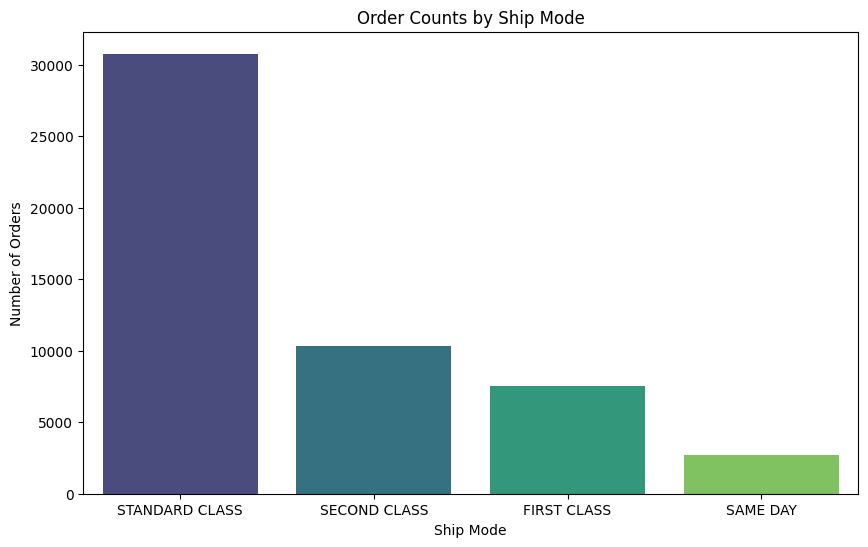

In [18]:
import seaborn as sns

# Stacked Bar Chart for Ship Mode Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_counts['Ship Mode'], y=ship_mode_counts['Order Count'], palette='viridis')
plt.title('Order Counts by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.show()


## Give the report to see sales over the city, states, region and market. (Score: 1)



Steps to Analyze Sales Over City, State, Region, and Market
1. Prepare Aggregated Data


In [19]:
# Aggregate sales by City, State, Region, and Market
city_sales = data.groupby('City')['Sales'].sum().reset_index()
state_sales = data.groupby('State')['Sales'].sum().reset_index()
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
market_sales = data.groupby('Market')['Sales'].sum().reset_index()

# Display the aggregated tables
print(city_sales.head())  # Sales by City
print(state_sales.head())  # Sales by State
print(region_sales.head())  # Sales by Region
print(market_sales.head())  # Sales by Market


     City     Sales
0  Aachen  3803.151
1   Aalen   979.695
2   Aalst   387.330
3     Aba  1064.124
4  Abadan  1354.950
     State     Sales
0   'Ajman   209.988
1   'Amman  7167.990
2    'Asir  1603.500
3     Abia  1064.124
4  Abruzzi  6723.750
         Region         Sales
0        Africa  7.837732e+05
1        Canada  6.692817e+04
2     Caribbean  3.242809e+05
3       Central  2.822303e+06
4  Central Asia  7.528266e+05
   Market         Sales
0    APAC  3.585744e+06
1  Africa  7.837732e+05
2  Canada  6.692817e+04
3    EMEA  8.061613e+05
4      EU  2.938089e+06


2. Create Visualizations
a. Heatmap: Sales Intensity by City or State


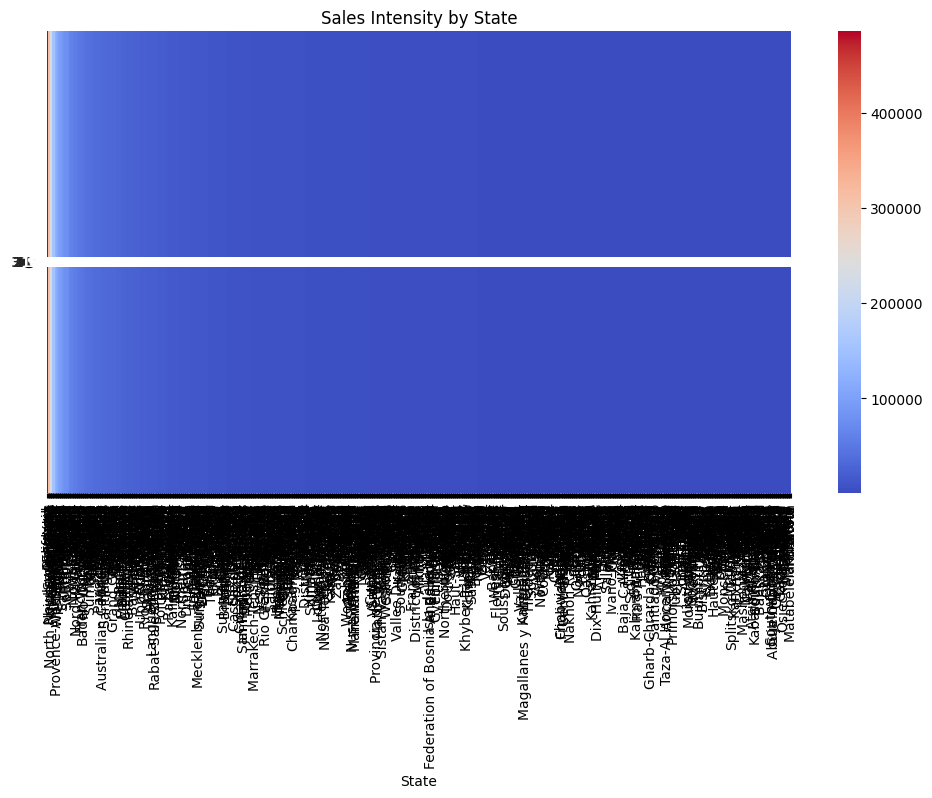

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample heatmap for State Sales
plt.figure(figsize=(12, 6))
state_sales_sorted = state_sales.sort_values(by='Sales', ascending=False).reset_index()
sns.heatmap([state_sales_sorted['Sales']], annot=True, fmt='.2f', 
            xticklabels=state_sales_sorted['State'], cbar=True, cmap='coolwarm')
plt.title('Sales Intensity by State')
plt.xlabel('State')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()


b. Bar Charts: Sales Across Regions and Markets


C:\Users\hp\AppData\Local\Temp\ipykernel_13796\1739609978.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




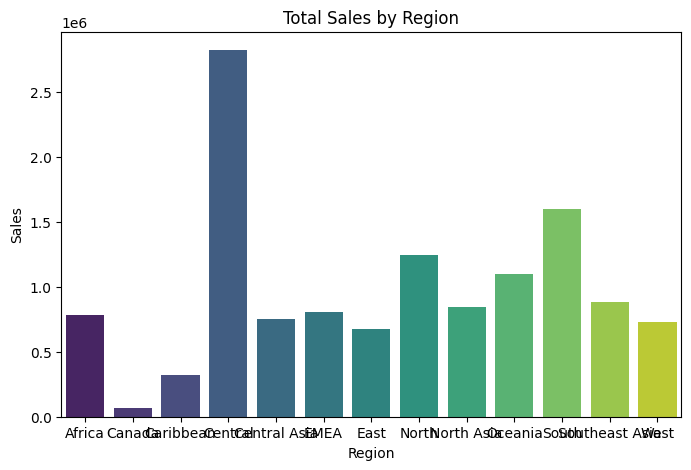

C:\Users\hp\AppData\Local\Temp\ipykernel_13796\1739609978.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




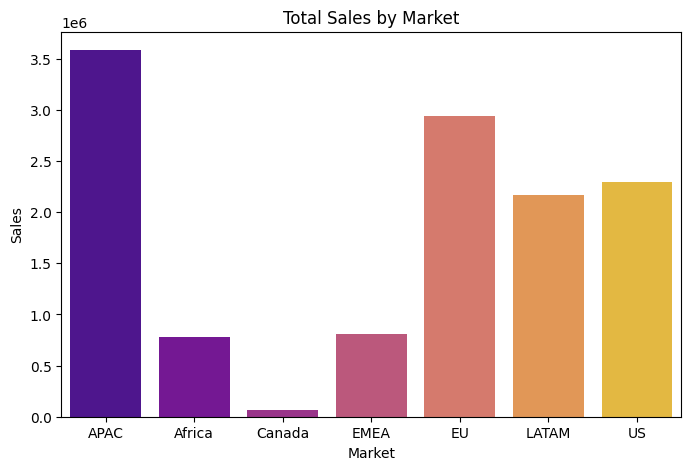

In [21]:
# Bar Chart for Sales by Region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

# Bar Chart for Sales by Market
plt.figure(figsize=(8, 5))
sns.barplot(x='Market', y='Sales', data=market_sales, palette='plasma')
plt.title('Total Sales by Market')
plt.xlabel('Market')
plt.ylabel('Sales')
plt.show()


## Create tables for all the visualizations.

1. Data Preparation
Prepare the data tables for each visualization, ensuring they match the aggregated insights visualized.




a. Table for Sales by City


In [22]:
city_sales_table = data.groupby('City')['Sales'].sum().reset_index()
city_sales_table.to_csv('city_sales_table.csv', index=False)
print(city_sales_table.head())  # View sample table


     City     Sales
0  Aachen  3803.151
1   Aalen   979.695
2   Aalst   387.330
3     Aba  1064.124
4  Abadan  1354.950


b. Table for Sales by State


In [23]:
state_sales_table = data.groupby('State')['Sales'].sum().reset_index()
state_sales_table.to_csv('state_sales_table.csv', index=False)
print(state_sales_table.head())


     State     Sales
0   'Ajman   209.988
1   'Amman  7167.990
2    'Asir  1603.500
3     Abia  1064.124
4  Abruzzi  6723.750


c. Table for Sales by Region


In [24]:
region_sales_table = data.groupby('Region')['Sales'].sum().reset_index()
region_sales_table.to_csv('region_sales_table.csv', index=False)
print(region_sales_table)


            Region         Sales
0           Africa  7.837732e+05
1           Canada  6.692817e+04
2        Caribbean  3.242809e+05
3          Central  2.822303e+06
4     Central Asia  7.528266e+05
5             EMEA  8.061613e+05
6             East  6.787812e+05
7            North  1.248166e+06
8       North Asia  8.483098e+05
9          Oceania  1.100185e+06
10           South  1.600907e+06
11  Southeast Asia  8.844232e+05
12            West  7.254578e+05


d. Table for Sales by Market


In [25]:
market_sales_table = data.groupby('Market')['Sales'].sum().reset_index()
market_sales_table.to_csv('market_sales_table.csv', index=False)
print(market_sales_table)


   Market         Sales
0    APAC  3.585744e+06
1  Africa  7.837732e+05
2  Canada  6.692817e+04
3    EMEA  8.061613e+05
4      EU  2.938089e+06
5   LATAM  2.164605e+06
6      US  2.297201e+06


e. Table for Shipping Percentages by Ship Mode


In [26]:
ship_mode_table = data['Ship Mode'].value_counts(normalize=True).mul(100).reset_index()
ship_mode_table.columns = ['Ship Mode', 'Percentage']
ship_mode_table.to_csv('ship_mode_table.csv', index=False)
print(ship_mode_table)


        Ship Mode  Percentage
0  STANDARD CLASS   60.001950
1    SECOND CLASS   20.099435
2     FIRST CLASS   14.632482
3        SAME DAY    5.266134
